In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")



Warnings ignored!!




**Olivetti Dataset** 

About Olivetti Dataset:

1.  Each of the 40 separate people has ten different images.
2.  The dataset contains 400 face images that were taken at various times with varying lighting, facial expression, and facial detail.
3. Each image has a black background and is 64x64 pixels.
4. Names of 40 individuals were encoded to integers between 0 and 39.


In [56]:
data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")

Verifying the dataset

In [57]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [58]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [59]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

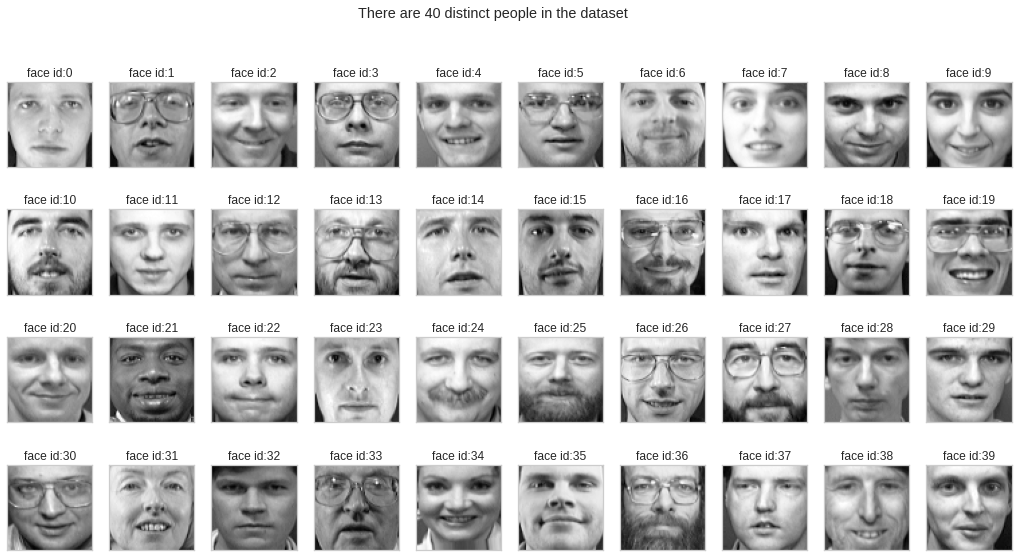

In [60]:
show_40_distinct_people(data, np.unique(target))

Each face of a subject has different characteristic in context of varying lighting, facial express and facial detail(glasses, beard)

**Machine Learning Model fo Face Recognition**

Machine learning models can work on vectors. Since the image data is in the matrix form, it must be converted to a vector.

In [61]:
#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


**Stratified Split data and target into Random train and test Subsets** 

The data set contains 10 face images for each subject. Of the face images, 70 percent will be used for training, 30 percent for testing. Uses stratify feature to have equal number of training and test images for each subject. Thus, there will be 7 training images and 3 test images for each subject. You can play with training and test rates.*italicised text*

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit

n_splits = 1  # We only want a single split in this case
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.25, random_state=0)

for train_index, test_index in sss.split(X, target):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]

print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (300, 4096)
y_train shape:(300,)


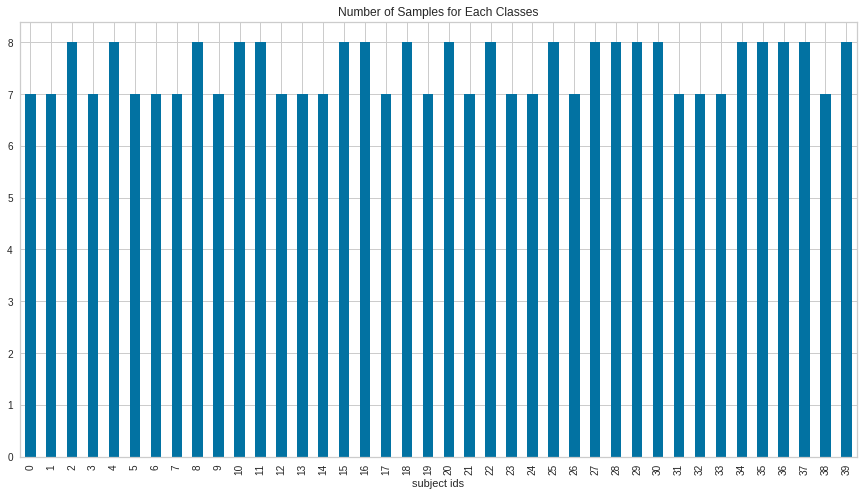

In [63]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [64]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)


**Logistic Regression model** 


In [65]:
models=[]
models.append(("LR",LogisticRegression()))

for name, model in models:
    
    clf=model

    clf.fit(X_train, y_train)

    y_pred=clf.predict(X_test)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LR RESULT ==========
Accuracy score:0.95



95% Accuracy

In [66]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       0.67      1.00      0.80         2
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         2
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
   

**K-Fold cross Validation  Results**  

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
X_k=standard_scaler.fit_transform(X)
for name, model in models:
    kfold=KFold(n_splits=10, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_k, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

LR mean cross validations score:0.98


According to the cross validation score Logistic Regression has 98% accuracy before KMeans clustering dimensionality reduction

Calculating silhoute scores to find optimum number of clusters, setting max value as 40 because of 40 unique labels

In [105]:
from sklearn import linear_model, preprocessing, model_selection, pipeline, ensemble, tree, datasets, cluster
from sklearn.metrics import silhouette_score
for i in range(10,41):
  km = cluster.KMeans(n_clusters=i, random_state=42)
  km.fit_predict(X_k)
  score = silhouette_score(X_k, km.labels_, metric='euclidean')
  print('Cluster:',i,' Silhouetter Score: %.3f' % score)

Cluster: 10  Silhouetter Score: 0.085
Cluster: 11  Silhouetter Score: 0.098
Cluster: 12  Silhouetter Score: 0.098
Cluster: 13  Silhouetter Score: 0.096
Cluster: 14  Silhouetter Score: 0.097
Cluster: 15  Silhouetter Score: 0.100
Cluster: 16  Silhouetter Score: 0.099
Cluster: 17  Silhouetter Score: 0.104
Cluster: 18  Silhouetter Score: 0.102
Cluster: 19  Silhouetter Score: 0.110
Cluster: 20  Silhouetter Score: 0.104
Cluster: 21  Silhouetter Score: 0.118
Cluster: 22  Silhouetter Score: 0.105
Cluster: 23  Silhouetter Score: 0.118
Cluster: 24  Silhouetter Score: 0.126
Cluster: 25  Silhouetter Score: 0.123
Cluster: 26  Silhouetter Score: 0.129
Cluster: 27  Silhouetter Score: 0.118
Cluster: 28  Silhouetter Score: 0.123
Cluster: 29  Silhouetter Score: 0.133
Cluster: 30  Silhouetter Score: 0.134
Cluster: 31  Silhouetter Score: 0.131
Cluster: 32  Silhouetter Score: 0.136
Cluster: 33  Silhouetter Score: 0.132
Cluster: 34  Silhouetter Score: 0.146
Cluster: 35  Silhouetter Score: 0.138
Cluster: 36 

K=40 looks to be the optimum number of cluster

KMeans Clustering with 40 clusters set fit into K-Fold cross validation

In [78]:
from sklearn import linear_model, preprocessing, model_selection, pipeline, ensemble, tree, datasets, cluster
km = pipeline.make_pipeline(preprocessing.StandardScaler(), cluster.KMeans(n_clusters = 40),
                           LogisticRegression())
for name, model in models:
    kfold=KFold(n_splits=10, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(km, X_k, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))


LR mean cross validations score:0.85


The KMeans Clustered set gave only 85% accuracy